In [1]:
# IMPORT STATEMENTS

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.inspection import permutation_importance

RANDOM_STATE = 42

In [2]:
# CREATE DATAFRAME
df = pd.read_csv('college_raw.csv', low_memory=False)

pd.set_option('display.max_columns', None)
df.head()

UNITID      OPEID   OPEID6                               INSTNM  \
0  100654   100200.0   1002.0             Alabama A & M University   
1  100663   105200.0   1052.0  University of Alabama at Birmingham   
2  100690  2503400.0  25034.0                   Amridge University   
3  100706   105500.0   1055.0  University of Alabama in Huntsville   
4  100724   100500.0   1005.0             Alabama State University   

         CITY STABBR         ZIP  \
0      Normal     AL       35762   
1  Birmingham     AL  35294-0110   
2  Montgomery     AL  36117-3553   
3  Huntsville     AL       35899   
4  Montgomery     AL  36104-0271   

                                        ACCREDAGENCY  \
0  Southern Association of Colleges and Schools C...   
1  Southern Association of Colleges and Schools C...   
2  Southern Association of Colleges and Schools C...   
3  Southern Association of Colleges and Schools C...   
4  Southern Association of Colleges and Schools C...   

                              INSTURL  \
0                       www.aamu.edu/   
1                https://www.uab.edu/   
2  https://www.amridgeuniversity.edu/   
3                        www.uah.edu/   
4                      www.alasu.edu/   

                                              NPCURL  SCH_DEG  HCM2  MAIN  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...      3.0     0     1   
1  https://tcc.ruffalonl.com/University of Alabam...      3.0     0     1   
2           https://www2.amridgeuniversity.edu:9091/      3.0     0     1   
3                                    finaid.uah.edu/      3.0     0     1   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...      3.0     0     1   

   NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  LOCALE  LOCALE2  \
0          1        3        4        1        1       5    12.0      NaN   
1          1        3        4        1        1       5    12.0      NaN   
2          1        3        4        2        1       5    12.0      NaN   
3          1        3        4        1        1       5    12.0      NaN   
4          1        3        4        1        1       5    12.0      NaN   

    LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  ANNHI  \
0  34.783368 -86.568502     18.0      10.0      14.0   1.0  0.0    0.0   
1  33.505697 -86.799345     15.0       9.0      15.0   0.0  0.0    0.0   
2  32.362609 -86.174010     20.0       5.0       6.0   0.0  0.0    0.0   
3  34.724557 -86.640449     15.0      15.0      13.0   0.0  0.0    0.0   
4  32.364317 -86.295677     17.0      10.0      14.0   1.0  0.0    0.0   

   TRIBAL  AANAPII  HSI  NANTI  MENONLY  WOMENONLY  RELAFFIL  ADM_RATE  \
0     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.6622   
1     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.8842   
2     0.0      0.0  0.0    0.0      0.0        0.0      74.0       NaN   
3     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.7425   
4     0.0      0.0  0.0    0.0      0.0        0.0       NaN    0.9564   

   ADM_RATE_ALL  SATVR25  SATVR75  SATMT25  SATMT75  SATWR25  SATWR75  \
0      0.662209    420.0    540.0    390.0    520.0    370.0    457.0   
1      0.884238    570.0    700.0    560.0    700.0      NaN      NaN   
2           NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3      0.742509    595.0    700.0    600.0    740.0      NaN      NaN   
4      0.956416    444.0    538.0    421.0    531.0      NaN      NaN   

   SATVRMID  SATMTMID  SATWRMID  ACTCM25  ACTCM75  ACTEN25  ACTEN75  ACTMT25  \
0     475.0     460.0     414.0     14.0     19.0     13.0     20.0     14.0   
1     637.0     644.0       NaN     22.0     30.0     22.0     33.0     20.0   
2       NaN       NaN       NaN      NaN      NaN      NaN      NaN      NaN   
3     640.0     655.0       NaN     25.0     31.0     24.0     33.0     24.0   
4     488.0     457.0       NaN     16.0     20.0     15.0     21.0     15.0   

   ACTMT75  ACTWR25  ACTWR75  ACTCMMID  ACTEN

In [3]:
# STRUCTURE AND QUALITY OF DATASET

df.shape
df.columns[:20]
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429 entries, 0 to 6428
Columns: 3306 entries, UNITID to SCORECARD_SECTOR
dtypes: float64(920), int64(14), object(2372)
memory usage: 162.2+ MB


UNITID         OPEID        OPEID6      SCH_DEG         HCM2  \
count  6.429000e+03  6.405000e+03   6405.000000  5926.000000  6429.000000   
mean   2.355496e+06  1.762653e+06  17142.511319     1.961019     0.005600   
std    8.043861e+06  2.173129e+06  15339.556402     0.901943     0.074627   
min    1.006540e+05  1.002000e+05   1002.000000     1.000000     0.000000   
25%    1.745700e+05  3.048000e+05   3037.000000     1.000000     0.000000   
50%    2.295400e+05  1.019817e+06  10198.000000     2.000000     0.000000   
75%    4.589550e+05  3.101900e+06  30987.000000     3.000000     0.000000   
max    4.966450e+07  8.209882e+07  43098.000000     3.000000     1.000000   

              MAIN    NUMBRANCH      PREDDEG      HIGHDEG      CONTROL  \
count  6429.000000  6429.000000  6429.000000  6429.000000  6429.000000   
mean      0.788303     3.183699     1.823612     2.247006     2.056618   
std       0.408543     6.591915     1.086918     1.388220     0.832540   
min       0.000000     1.000000     0.000000     0.000000     1.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     2.000000     2.000000     2.000000   
75%       1.000000     2.000000     3.000000     4.000000     3.000000   
max       1.000000    52.000000     4.000000     4.000000     3.000000   

           ST_FIPS       REGION       LOCALE  LOCALE2     LATITUDE  \
count  6429.000000  6429.000000  5924.000000      0.0  5924.000000   
mean     29.010733     4.646290    19.943450      NaN    37.272320   
std      16.888467     2.172825     9.841441      NaN     5.857215   
min       1.000000     0.000000    -3.000000      NaN   -14.322636   
25%      13.000000     3.000000    12.000000      NaN    33.909579   
50%      29.000000     5.000000    21.000000      NaN    38.614493   
75%      42.000000     6.000000    22.000000      NaN    41.232882   
max      78.000000     9.000000    43.000000      NaN    71.324702   

         LONGITUDE      CCBASIC     CCUGPROF     CCSIZSET         HBCU  \
count  5924.000000  5924.000000  5924.000000  5924.000000  5924.000000   
mean    -90.477295     9.680452     3.527684     4.573937     0.017049   
std      18.171108    10.845858     5.649604     6.500336     0.129466   
min    -170.742774    -2.000000    -2.000000    -2.000000     0.000000   
25%     -97.542708    -2.000000    -2.000000    -2.000000     0.000000   
50%     -86.317653     8.000000     1.000000     3.000000     0.000000   
75%     -78.913484    20.000000    10.000000    10.000000     0.000000   
max     171.378129    33.000000    15.000000    18.000000     1.000000   

               PBI        ANNHI       TRIBAL      AANAPII          HSI  \
count  5924.000000  5924.000000  5924.000000  5924.000000  5924.000000   
mean      0.010804     0.003038     0.005908     0.034774     0.094193   
std       0.103386     0.055043     0.076644     0.183222     0.292122   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             NANTI      MENONLY    WOMENONLY    RELAFFIL     ADM_RATE  \
count  5924.000000  5924.000000  5924.000000  880.000000  1946.000000   
mean      0.006077     0.010466     0.005064   56.022727     0.727594   
std       0.077724     0.101775     0.070988   22.211250     0.229527   
min       0.000000     0.000000     0.000000   22.000000     0.000000   
25%       0.000000     0.000000     0.000000   30.000000     0.603975   
50%       0.000000     0.000000     0.000000   54.000000     0.779150   
75%       0.000000     0.000000     0.000000   71.000000     0.908175   
max       1.000000     1.000000     1.000000  110.000000     1.000000   

       ADM_RATE_ALL     SATVR

In [4]:
# CHECK THE COLUMNS OF THE DF

df.columns[:50].tolist()

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25']

In [5]:
# DEFINE THE TARGET VALUE & REMOVE ROWS WHERE TARGET IS MISSING

target = 'ADM_RATE'

# Selectivity is defined as <=0.25
SELECTIVITY_THRESHOLD = 0.25

# Drop colleges where the acceptance rate is missing
df_clean = df.dropna(subset=[target]).copy()

y = (df_clean[target] <= SELECTIVITY_THRESHOLD).astype(int)
y.name = 'IS_SELECTIVE'

# Define all features that are to be used
X = df_clean.drop(columns=[target, 'ADM_RATE_ALL'])

print(f"Target Variable: {y.name}")
print(f"Distribution Check: (Non-Selective (0) vs. Count of Selective (1)):\n{y.value_counts()}")

Target Variable: IS_SELECTIVE
Distribution Check: (Non-Selective (0) vs. Count of Selective (1)):
IS_SELECTIVE
0    1839
1     107
Name: count, dtype: int64


In [6]:
# CHECK FOR CATEOGRICAL AND NUMERICAL FEATURES

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns


print(f"# Numeric Features: {len(numeric_cols)}")
print(f"# Categorical Features: {len(cat_cols)}")

# Numeric Features: 932
# Categorical Features: 2372


### CLEANING & EDA ###

In [7]:
# DROP COLUMNS WITH MORE THAN 50% MISSING VALUES

MISSING_THRESHOLD = 0.50

missing_fraction = X.isnull().mean()
missing_cols = missing_fraction[missing_fraction >= MISSING_THRESHOLD].index.tolist()

# Drop the columns with high amount vals missing
X = X.drop(columns=missing_cols)

print(f"MISSING Columns Dropped: {len(missing_cols)}")


MISSING Columns Dropped: 201


In [8]:
# DROP COLUMNS THAT ARE THE EXACT SAME

num_dupes = X.duplicated().sum()
print(f"DUPLICATED Columns Dropped: {num_dupes}")

DUPLICATED Columns Dropped: 0


In [9]:
# DROP COLUMNS WITH CONSTANT VALUES

# Find constant columns
const_cols = [col for col in X.columns if X[col].nunique(dropna=False) <= 1]

# Drop the constnat columns
X = X.drop(columns=const_cols)
print(f"CONSTANT Columns Dropped: {len(const_cols)}")

CONSTATN Columns Dropped: 12


In [10]:
# DROP COLUMNS WITH MORE THAN 50% PRIVACY SUPPRESSED (PS) VALUES

PS_THRESHOLD = 0.50

# Find ps columns
ps_fraction = X.apply(lambda col: (col.astype(str) == "PS").mean())
ps_cols = ps_fraction[ps_fraction >= PS_THRESHOLD].index.tolist()

# Drop ps columns
X = X.drop(columns=ps_cols)

print(f"PRIVACY SUPPRESSED Columns Dropped: {len(ps_cols)}")


PRIVACY SUPPRESSED Columns Dropped: 928


In [11]:
# DROP HIGH CARDINALITY COLUMNS

# Define high cardiantly threshold to be > 50
CARDINALITY_THRESHOLD = 50

# Find and Drop high card columns
high_card_cols = [col for col in cat_cols if df[col].nunique(dropna=True) > CARDINALITY_THRESHOLD]
X = X.drop(columns=high_card_cols, errors="ignore")

print(f"HIGH CARDINALITY Columns Dropped: {len(high_card_cols)}")


HIGH CARDINALITY Columns Dropped: 1623


In [12]:
# DROP LOW VARINCE COLUMNS

# Define low variance threshold to be >0.98
LOW_VAR_THRESHOLD = 0.98

# Find and drop low var vols
low_var_cols = [col for col in X.columns if X[col].value_counts(normalize=True, dropna=False).iloc[0] > LOW_VAR_THRESHOLD]
X = X.drop(columns=low_var_cols)

print(f"LOW VARIANCE Columns Dropped: {len(low_var_cols)}")


LOW VARIANCE Columns Dropped: 109


In [13]:
# Find correlation coefficients for all numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns
corr = X[numeric_cols].corr().abs()

# Define 0.80 coefficient threshold
CORR_THRESHOLD = 0.80

# Determine avaerage correlation
avg_corr = corr.mean()

cols = corr.columns
cols_to_remove = set()


# Loop through highly correlated pairs to determine which to drop
for i in range(len(cols)):
    for j in range(i):
        A = cols[i]
        B = cols[j]

        if corr.loc[A, B] >= CORR_THRESHOLD:

            # Dont remove if already in removed
            if A in cols_to_remove or B in cols_to_remove:
                continue

            # Compare the average average correlations
            if avg_corr[A] > avg_corr[B]:
                cols_to_remove.add(A)
            else:
                cols_to_remove.add(B)

# Drop the one of each correlated feature pair
X = X.drop(columns=list(cols_to_remove))
print(f"COLINEAR Columns Dropped: {len(cols_to_remove)}")


COLINEAR Columns Dropped: 334


In [14]:
# DROP FEATURES RELATED TO CLASSIFICATION OF INSTRUCTIONAL PROGRAMS

cip_cols = [col for col in X.columns if col.upper().startswith(("CIP", "PCIP"))]
X = X.drop(columns=cip_cols)
print(f"CIP Columns Dropped: {len(cip_cols)}")


CIP Columns Dropped: 120


In [15]:
# REMOVE LEAKAGE COLUMNS

# Column name starts corresponding to leakage
LEAK_START = [
    "C100", "C150", "C200","D100", "D150", "D200","RET_", "TRANS_","OM", "POOLYRSOM_","POOLYRSRET", "POOLYRS100", "POOLYRS150", "POOLYRS200",
    "MD_EARN", "MDEARN", "SD_EARN", "COUNT_NWNE","GT_THRESHOLD","REPAY","CDR","BBRR","G12MN"]

# Select all columns start=ing with leakage prefixes
def is_leakage(col):
    return col.startswith(tuple(LEAK_START))
leak_cols = [col for col in X.columns if is_leakage(col)]

# Drop leakage
X = X.drop(columns=leak_cols)
print(f"LEAKAGE Columns Dropped: {len(leak_cols)}")


LEAKAGE Columns Dropped: 472


In [21]:
# DROP REMAINING IDENTIFIER COLUMNS
id_cols = ['MAIN','ACCREDAGENCY','UNITID', 'OPEID']


id_cols = [col for col in id_cols if col in X.columns]

print(f"ID Columns Dropped: {len(id_cols)}")
X = X.drop(columns=id_cols, errors="ignore")


ID Columns Dropped: 0


In [22]:
# SUMMARY

print("\n--- Numerical Summary ---")
print(X.describe().T)


--- Numerical Summary ---
                       count         mean          std   min        25%  \
NUMBRANCH             1946.0     1.767215     3.097851   1.0    1.00000   
HIGHDEG               1946.0     3.513875     0.895038   0.0    3.00000   
CONTROL               1946.0     1.775437     0.589918   1.0    1.00000   
ST_FIPS               1946.0    30.800617    15.786862   1.0   18.00000   
REGION                1946.0     4.117677     2.184551   0.0    2.00000   
...                      ...          ...          ...   ...        ...   
IRPS_UNKN             1915.0     0.031391     0.070885   0.0    0.00000   
IRPS_WHITE            1915.0     0.711038     0.231549   0.0    0.62485   
IRPS_WOMEN            1915.0     0.511363     0.203920   0.0    0.43745   
DCS_PELL_LOAN         1937.0  4130.745483  7837.730411   4.0  505.00000   
COUNT_WNE_INDEP1_P11  1486.0   642.104980  2137.964505  16.0   76.00000   

                            50%        75%       max  
NUMBRANCH        

In [24]:
# REMAINING COLUMNS
cols = list(X.columns)
cols

['NUMBRANCH',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'AANAPII',
 'HSI',
 'MENONLY',
 'SAT_AVG_ALL',
 'UGDS_WHITE',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_ASIAN',
 'UGDS_AIAN',
 'UGDS_NHPI',
 'UGDS_2MOR',
 'UGDS_NRA',
 'UGDS_UNKN',
 'PPTUG_EF',
 'NPT41_PRIV',
 'NPT4_75UP_PRIV',
 'NUM41_PRIV',
 'NUM43_PRIV',
 'TUITIONFEE_IN',
 'TUITFTE',
 'INEXPFTE',
 'AVGFACSAL',
 'PFTFAC',
 'PCTPELL',
 'PFTFTUG1_EF',
 'PCTFLOAN',
 'UG25ABV',
 'ICLEVEL',
 'UGDS_MEN',
 'UGNONDS',
 'ACCREDCODE',
 'POOLYRS_FTFTAIDPCT',
 'PPLUS_PCT_HIGH_POOLED_SUPP',
 'BOOKSUPPLY',
 'ROOMBOARD_ON',
 'OTHEREXPENSE_ON',
 'ROOMBOARD_OFF',
 'OTHEREXPENSE_OFF',
 'OTHEREXPENSE_FAM',
 'ENDOWBEGIN',
 'DOLPROVIDER',
 'ADMCON7',
 'MDCOMP_PD',
 'MDCOST_PD',
 'STUFACR',
 'IRPS_2MOR',
 'IRPS_AIAN',
 'IRPS_ASIAN',
 'IRPS_BLACK',
 'IRPS_NHPI',
 'IRPS_NRA',
 'IRPS_UNKN',
 'IRPS_WHITE',
 'IRPS_WOMEN',
 'CONTROL_PEPS',
 'DCS_PELL_LOAN',
 'COUNT_WNE_IND

In [25]:
# CHECK FOR CATEOGRICAL AND NUMERICAL FEATURES

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns


print(f"# Numeric Features: {len(numeric_cols)}")
print(f"# Categorical Features: {len(cat_cols)}")

# Numeric Features: 67
# Categorical Features: 2


### FEATURE SELECTION ###

/var/folders/fv/pr21mymd1v1882t5qyschcx00000gn/T/ipykernel_80215/433285254.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


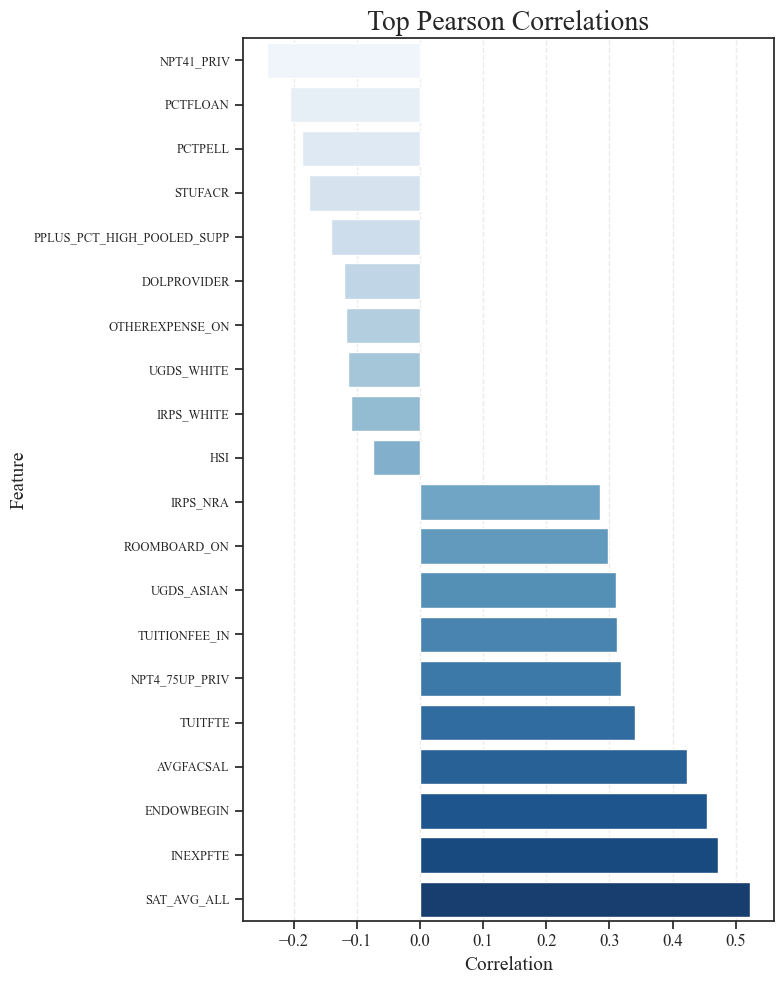

In [ ]:
# --- Compute correlations ---
num_cols = X.select_dtypes(include=[np.number]).columns
pearson_corr = X[num_cols].corrwith(y).sort_values()

# Extract top 10 negative and top 10 positive
top_neg = pearson_corr.head(10)
top_pos = pearson_corr.tail(10)
pearson_top20 = pd.concat([top_neg, top_pos])

# --- Set global font to Times New Roman ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 20,        # Bigger title
    "axes.labelsize": 14,        # Axis labels
    "xtick.labelsize": 12,
    "ytick.labelsize": 9         # Smaller feature names
})

# --- PLOT (Top 20 ONLY) ---
plt.figure(figsize=(8, 10))

sns.barplot(
    x=pearson_top20.values,
    y=pearson_top20.index,
    palette=sns.color_palette("Blues", n_colors=len(pearson_top20))
)

plt.title("Top Pearson Correlations")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


Numeric cols: 70
Categorical cols: 3
Final MI feature matrix shape: (1946, 141)

Top 20 features by Mutual Information with selectiveness:

SAT_AVG_ALL                     MI = 0.0992
INEXPFTE                        MI = 0.0802
TUITIONFEE_IN                   MI = 0.0718
ENDOWBEGIN                      MI = 0.0696
AVGFACSAL                       MI = 0.0696
CCUGPROF                        MI = 0.0608
TUITFTE                         MI = 0.0495
UGDS_ASIAN                      MI = 0.0484
PFTFTUG1_EF                     MI = 0.0466
PCTFLOAN                        MI = 0.0444
ROOMBOARD_ON                    MI = 0.0386
NPT4_75UP_PRIV                  MI = 0.0362
PCTPELL                         MI = 0.0360
STUFACR                         MI = 0.0342
CCSIZSET                        MI = 0.0337
UGDS_NRA                        MI = 0.0333
CCBASIC                         MI = 0.0327
NPT41_PRIV                      MI = 0.0312
UG25ABV                         MI = 0.0297
ROOMBOARD_OFF           

/var/folders/fv/pr21mymd1v1882t5qyschcx00000gn/T/ipykernel_80215/2958478920.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


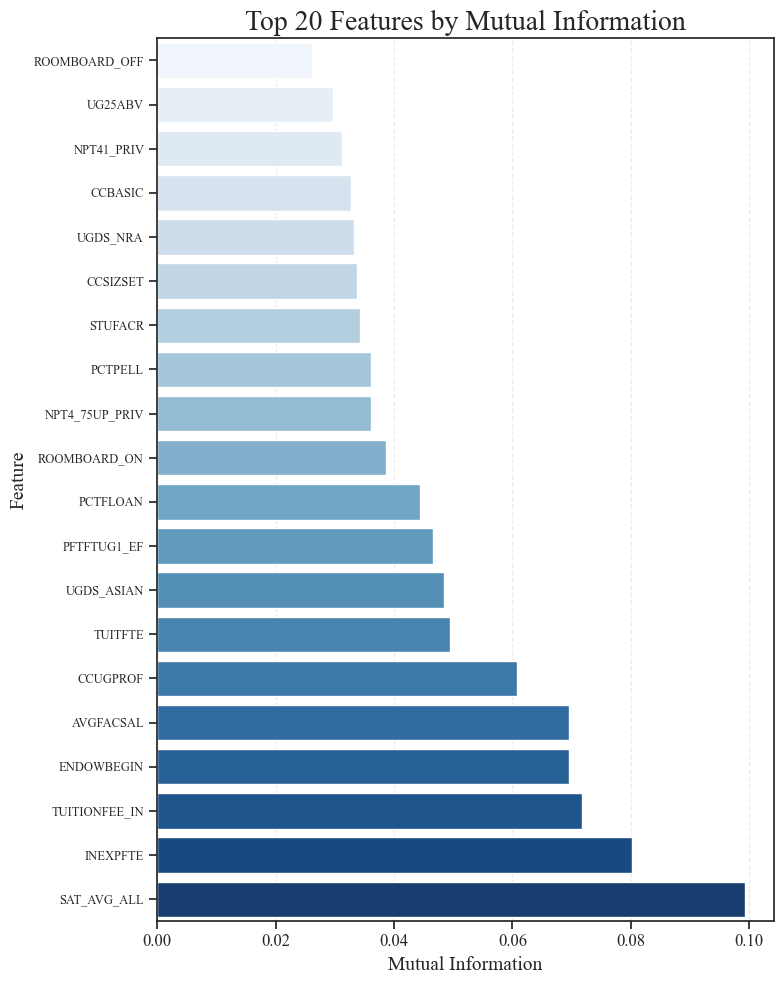

In [ ]:
# 1. Separate numeric and categorical columns
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric cols:", len(num_cols))
print("Categorical cols:", len(cat_cols))

# 2. Impute missing values
X_num = X[num_cols].copy()
X_num = X_num.fillna(X_num.median())   # median for numeric

if cat_cols:
    X_cat = X[cat_cols].copy()
    X_cat = X_cat.fillna("MISSING")   # fill NA with category
    # One-hot encode categoricals (uint8 dummies)
    X_cat_dummies = pd.get_dummies(X_cat, drop_first=True)
else:
    X_cat_dummies = pd.DataFrame(index=X.index)

# 3. Combine numeric + dummies
X_mi = pd.concat([X_num, X_cat_dummies], axis=1)

print("Final MI feature matrix shape:", X_mi.shape)

# 4. Compute Mutual Information with the binary target
mi_scores = mutual_info_classif(
    X_mi,
    y,
    discrete_features='auto',
    random_state=42
)

# 5. Put scores into a Series and sort
mi_series = pd.Series(mi_scores, index=X_mi.columns).sort_values(ascending=False)

TOP_K = 20
top_mi = mi_series.head(TOP_K)

print(f"\nTop {TOP_K} features by Mutual Information with selectiveness:\n")
for feat, score in top_mi.items():
    print(f"{feat:30s}  MI = {score:.4f}")

# ---------- PLOT (Top 20 MI Features) ----------

# Global font: Times New Roman + sizes
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 20,    # bigger title
    "axes.labelsize": 14,    # axis labels
    "xtick.labelsize": 12,
    "ytick.labelsize": 9     # smaller feature names
})

plt.figure(figsize=(8, 10))

sns.barplot(
    x=top_mi.sort_values().values,
    y=top_mi.sort_values().index,
    palette=sns.color_palette("Blues", n_colors=len(top_mi))
)

plt.title("Top 20 Features by Mutual Information")
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.grid(axis="x", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()



In [ ]:
# --- STEP 1: Extracting existing scores ---

pearson = pearson_corr.abs()
mi = mi_series

# Align indexes
common_features = pearson.index.intersection(mi.index)

pearson = pearson[common_features]
mi = mi[common_features]

# --- STEP 2: Normalizing to [0,1] ---

pearson_norm = (pearson - pearson.min()) / (pearson.max() - pearson.min())
mi_norm = (mi - mi.min()) / (mi.max() - mi.min())

# --- STEP 3: Weighted combined score ---

alpha = 0.7   # weight for Pearson
beta = 0.3    # weight for MI

combined_score = alpha * pearson_norm + beta * mi_norm
combined_score = combined_score.sort_values(ascending=False)

# --- STEP 4: Selecting top-k features ---

TOP_K = 20
final_features = combined_score.head(TOP_K).index.tolist()

print("\n===== FINAL SELECTED FEATURES =====")
for f in final_features:
    print(f)

# Final dataframe
X_final = X[final_features]



===== FINAL SELECTED FEATURES =====
SAT_AVG_ALL
INEXPFTE
ENDOWBEGIN
AVGFACSAL
TUITIONFEE_IN
TUITFTE
UGDS_ASIAN
NPT4_75UP_PRIV
ROOMBOARD_ON
IRPS_NRA
NPT41_PRIV
PCTFLOAN
UGDS_NRA
CCUGPROF
PCTPELL
PFTFTUG1_EF
STUFACR
ROOMBOARD_OFF
UGDS_2MOR
PPLUS_PCT_HIGH_POOLED_SUPP


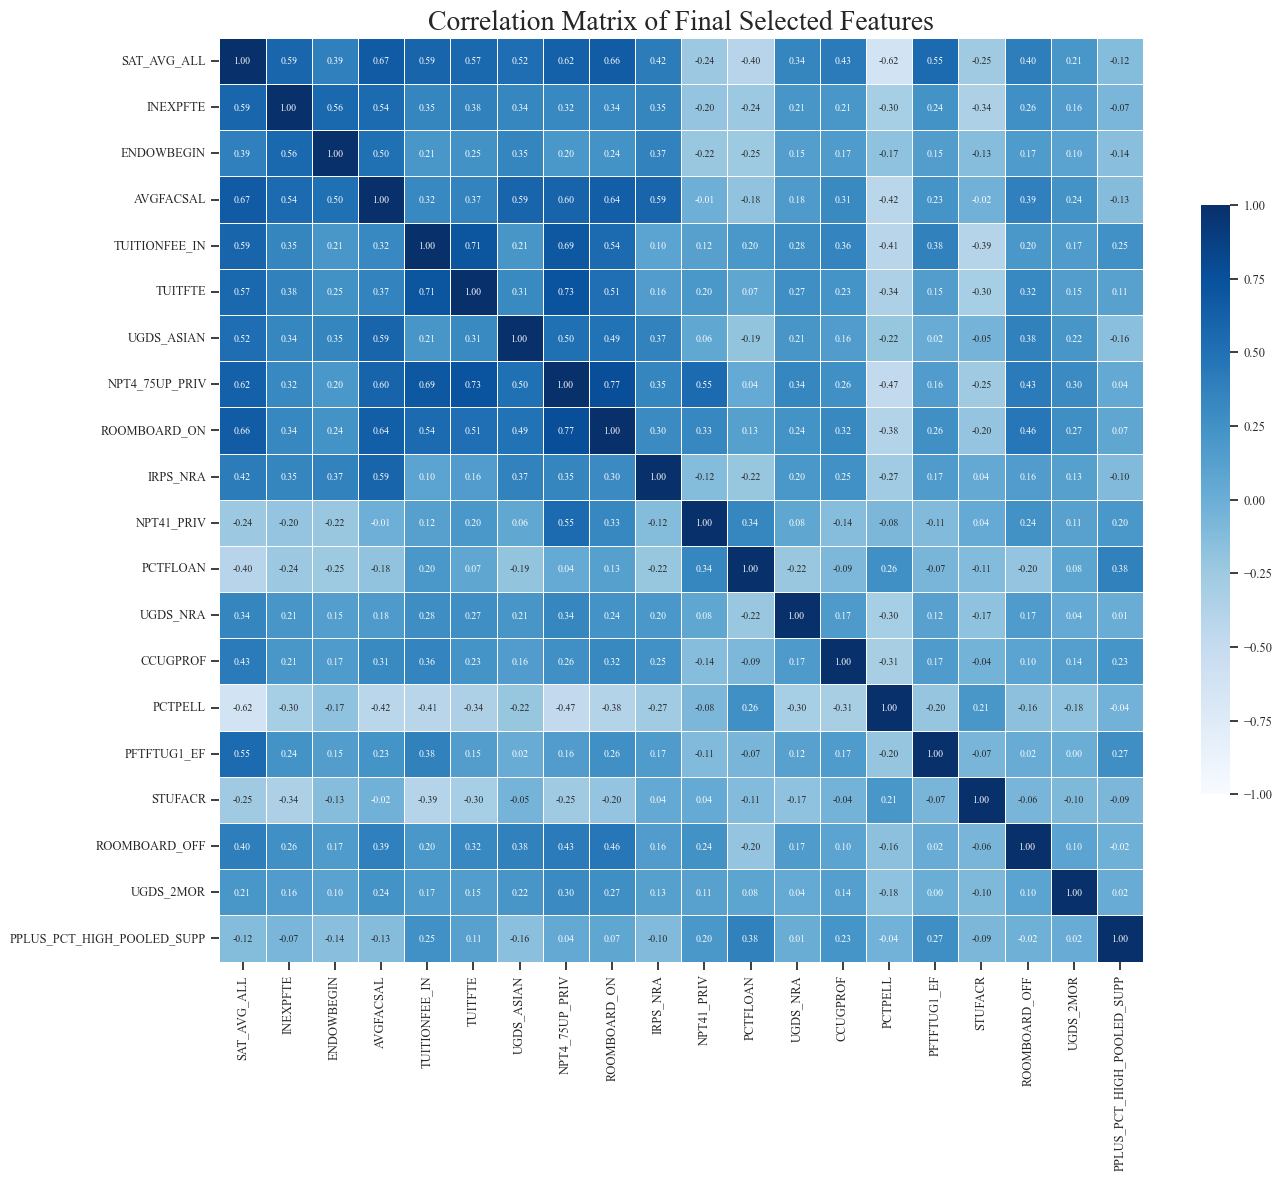

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Global style: Times New Roman ----
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "axes.titlesize": 20,     # bigger title
    "axes.labelsize": 12,     # axis labels
    "xtick.labelsize": 9,     # small ticks
    "ytick.labelsize": 9,
})

# Subset X to the final selected features
X_final = X[final_features].copy()

# Compute correlation matrix
corr = X_final.corr()

plt.figure(figsize=(14, 12))

sns.heatmap(
    corr,
    annot=True,               # show values
    fmt=".2f",
    cmap="Blues",
    vmin=-1, vmax=1,
    linewidths=0.5,
    square=True,
    annot_kws={"size": 7, "fontfamily": "Times New Roman"},  # annotation font
    cbar_kws={"shrink": 0.6}
)

plt.title("Correlation Matrix of Final Selected Features")
plt.tight_layout()
plt.show()



### END OF PREPROCESSING SECTION ###